In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Import Model Packages 
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

C:\Users\npc94\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\npc94\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\npc94\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\npc94\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import yfinance as yf
ticker = ('IVW','IVE','IWN','IWO','EFA','EEM','IEF','TLT','IAU')
start = '2010-01-01'

data = yf.download(ticker,start)

[*********************100%***********************]  9 of 9 completed


In [4]:
df = data['Adj Close']

<AxesSubplot:>

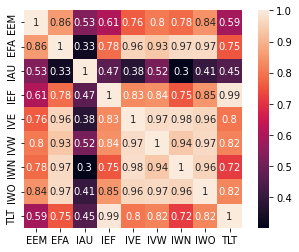

In [5]:
import seaborn as sns

sns.heatmap(df.corr(), vmax=1, square=True,annot=True)

In [6]:
df

,EEM,EFA,IAU,IEF,IVE,IVW,IWN,IWO,TLT
Date,,,,,,,,,
2009-12-31,32.241188,37.853188,21.474001,69.333969,39.477837,12.164898,45.286053,61.603802,64.391701
2010-01-04,33.181221,38.846088,21.978001,69.506180,40.110859,12.345302,46.479851,63.169449,64.334427
2010-01-05,33.422070,38.880314,21.954000,69.811325,40.326824,12.353695,46.308178,63.006535,64.749855
2010-01-06,33.491985,39.044666,22.326000,69.529602,40.423622,12.353695,46.214558,63.115139,63.883148
2010-01-07,33.297760,38.894020,22.181999,69.529602,40.773640,12.345302,46.760735,63.278065,63.990597
...,...,...,...,...,...,...,...,...,...
2022-10-24,33.930000,58.000000,31.320000,93.019997,137.850006,60.509998,137.330002,213.979996,92.400002
2022-10-25,34.209999,59.279999,31.389999,94.180000,139.559998,61.730000,140.619995,220.509995,95.089996
2022-10-26,34.770000,59.840000,31.600000,94.660004,140.360001,60.439999,141.250000,221.649994,96.459999


<AxesSubplot:>

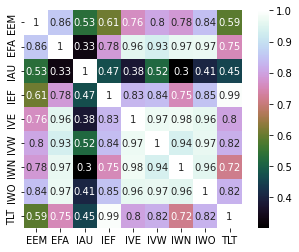

In [7]:
sns.heatmap(df.corr(), vmax=1, square=True,annot=True,cmap='cubehelix')

In [8]:
#Checking for any null values and removing the null values'''
print('Null Values =',df.isnull().values.any())

Null Values = False


In [9]:
# Daily Linear Returns (%)
datareturns = df.pct_change(1)

#Remove Outliers beyong 3 standard deviation
datareturns= datareturns[datareturns.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(datareturns)
rescaledDataset = pd.DataFrame(scaler.fit_transform(datareturns),columns = datareturns.columns, index = datareturns.index)
# summarize transformed data
datareturns.dropna(how='any', inplace=True)
rescaledDataset.dropna(how='any', inplace=True)
rescaledDataset.head(5)

,EEM,EFA,IAU,IEF,IVE,IVW,IWN,IWO,TLT
Date,,,,,,,,,
2010-01-04,2.442490,2.673897,2.527412,0.664354,1.814709,1.489940,2.268109,2.009712,-0.126353
2010-01-05,0.583243,0.043151,-0.143991,1.199506,0.556887,-0.018048,-0.384380,-0.273148,0.765550
2010-01-06,0.144561,0.390407,1.817671,-1.165690,0.204498,-0.090504,-0.236834,0.077733,-1.643373
2010-01-07,-0.525438,-0.448700,-0.726721,-0.032876,0.943602,-0.162910,0.984615,0.147677,0.185818
2010-01-08,0.640480,0.773907,0.504320,0.314727,0.136755,0.398467,0.427531,0.263736,-0.072795


In [11]:
# Dividing the dataset into training and testing sets
percentage = int(len(rescaledDataset) * 0.8)
X_train = rescaledDataset[:percentage]
X_test = rescaledDataset[percentage:]

X_train_raw = datareturns[:percentage]
X_test_raw = datareturns[percentage:]


stock_tickers = rescaledDataset.columns.values
n_tickers = len(stock_tickers)

In [12]:
pca = PCA()
PrincipalComponent=pca.fit(X_train)

In [13]:
pca.components_[0]

array([ 0.37826038,  0.39883853, -0.00190451, -0.25670492,  0.40483917,
        0.36122771,  0.36776522,  0.36765737, -0.2591186 ])

,Explained Variance
0,59.86%
1,78.96%
2,88.88%
3,93.68%
4,95.87%
5,97.52%
6,98.81%
7,99.70%
8,100.00%


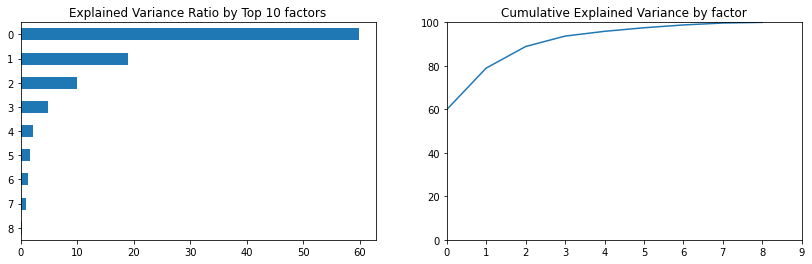

In [14]:
NumEigenvalues=10
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()*100
Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100
Series1.plot.barh(ylim=(0,9), label="woohoo",title='Explained Variance Ratio by Top 10 factors',ax=axes[0]);
Series2.plot(ylim=(0,100),xlim=(0,9),ax=axes[1], title='Cumulative Explained Variance by factor');
# explained_variance
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance').head(NumEigenvalues).style.format('{:,.2%}'.format)

In [15]:
def PCWeights():
    '''
    Principal Components (PC) weights for each 28 PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights

weights=PCWeights()

In [16]:
weights[0]

array([ 0.21481566,  0.22650208, -0.00108158, -0.14578381,  0.22990987,
        0.20514274,  0.20885542,  0.20879417, -0.14715454])

In [17]:
pca.components_[0]

array([ 0.37826038,  0.39883853, -0.00190451, -0.25670492,  0.40483917,
        0.36122771,  0.36776522,  0.36765737, -0.2591186 ])

In [18]:
weights[0]

array([ 0.21481566,  0.22650208, -0.00108158, -0.14578381,  0.22990987,
        0.20514274,  0.20885542,  0.20879417, -0.14715454])

array([[<AxesSubplot:title={'center':'Portfolio 0'}>],
       [<AxesSubplot:title={'center':'Portfolio 1'}>],
       [<AxesSubplot:title={'center':'Portfolio 2'}>],
       [<AxesSubplot:title={'center':'Portfolio 3'}>]], dtype=object)

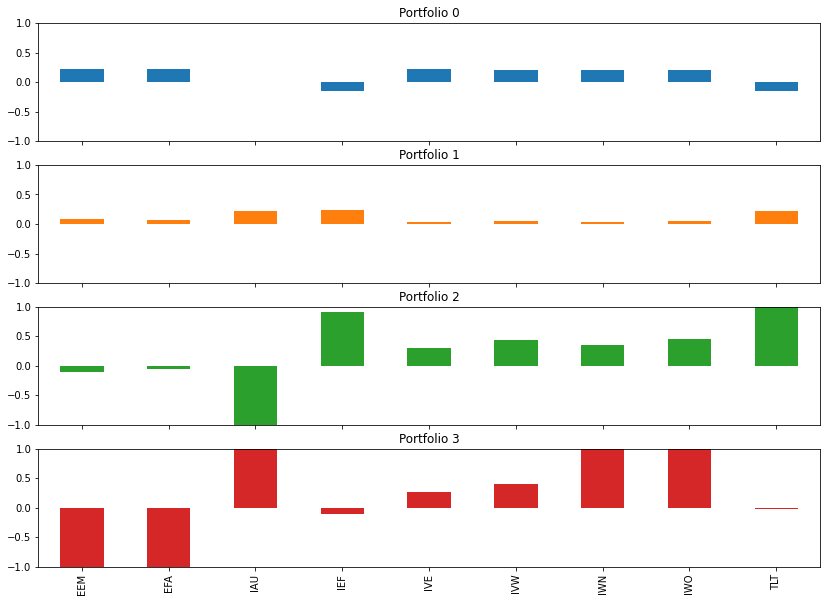

In [19]:
NumComponents=4
        
topPortfolios = pd.DataFrame(pca.components_[:NumComponents], columns=df.columns)
eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis=0)
eigen_portfolios.index = [f'Portfolio {i}' for i in range( NumComponents)]
np.sqrt(pca.explained_variance_)
eigen_portfolios.T.plot.bar(subplots=True, layout=(int(NumComponents),1), figsize=(14,10), legend=False, sharey=True, ylim= (-1,1))

<AxesSubplot:>

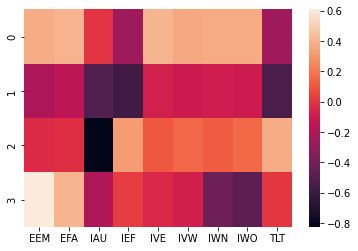

In [20]:
# plotting heatmap 
sns.heatmap(topPortfolios) 

In [21]:
# Sharpe Ratio
def sharpe_ratio(ts_returns, periods_per_year=252):
    '''
    Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
    It calculares the annualized return, annualized volatility, and annualized sharpe ratio.
    
    ts_returns are  returns of a signle eigen portfolio.
    '''
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

Eigen portfolio #0 with the highest Sharpe. Return 12.69%, vol = 10.83%, Sharpe = 1.17
     Return       Vol    Sharpe
0  0.126944  0.108296  1.172192
1  0.103464  0.095711  1.081000
2 -0.047219  0.265653 -0.177746
5 -0.999829  4.541482 -0.220155
8 -0.999999  4.465805 -0.223924
7 -0.999318  3.222311 -0.310125
6 -0.967743  2.366845 -0.408875
4 -0.902740  1.929917 -0.467761
3 -0.464592  0.716397 -0.648511


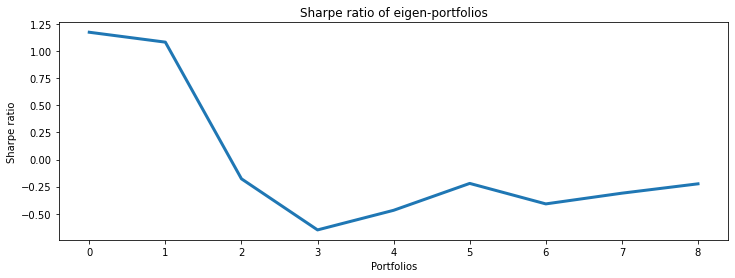

In [22]:
def optimizedPortfolio():
    n_portfolios = len(pca.components_)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    highest_sharpe = 0 
    stock_tickers = rescaledDataset.columns.values
    n_tickers = len(stock_tickers)
    pcs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = pcs[i] / sum(pcs[i])
        eigen_prtfi = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)
        eigen_prti_returns = np.dot(X_train_raw.loc[:, eigen_prtfi.index], pc_w)
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_train_raw.index)
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe
        
        sharpe_metric= np.nan_to_num(sharpe_metric)
        
    # find portfolio with the highest Sharpe ratio
    highest_sharpe = np.argmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100, 
           annualized_vol[highest_sharpe]*100, 
           sharpe_metric[highest_sharpe]))


    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

    results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results.head(20))

    plt.show()

optimizedPortfolio()

Sum of weights of current eigen-portfolio: 100.00


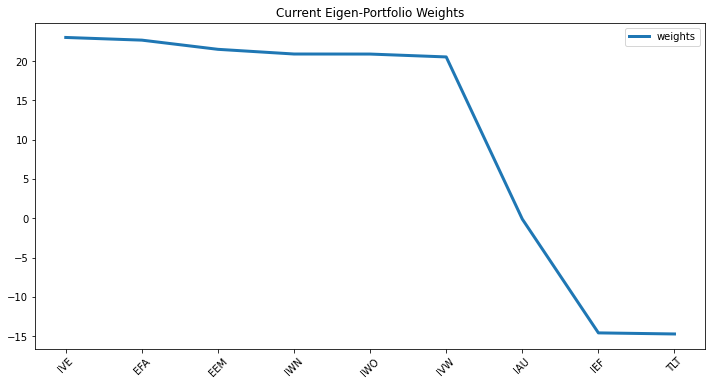

,weights
IVE,22.990987
EFA,22.650208
EEM,21.481566
IWN,20.885542
IWO,20.879417
IVW,20.514274
IAU,-0.108158
IEF,-14.578381
TLT,-14.715454


In [23]:
weights = PCWeights()
portfolio = portfolio = pd.DataFrame()

def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'weights': weights.squeeze()*100}, index = stock_tickers) 
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    if plot:
        print('Sum of weights of current eigen-portfolio: %.2f' % np.sum(portfolio))
        portfolio.plot(title='Current Eigen-Portfolio Weights', 
            figsize=(12,6), 
            xticks=range(0, len(stock_tickers),1), 
            rot=45, 
            linewidth=3
            )
        plt.show()


    return portfolio

# Weights are stored in arrays, where 0 is the first PC's weights.
plotEigen(weights=weights[0], plot=True)

Current Eigen-Portfolio:
Return = -76.46%
Volatility = 96.43%
Sharpe = -0.79


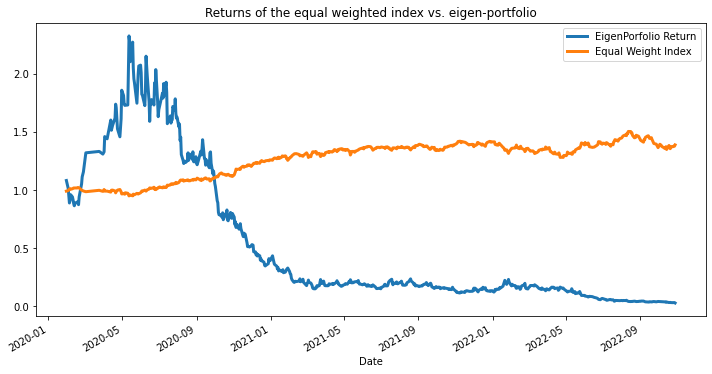

Current Eigen-Portfolio:
Return = 13.06%
Volatility = 10.80%
Sharpe = 1.21


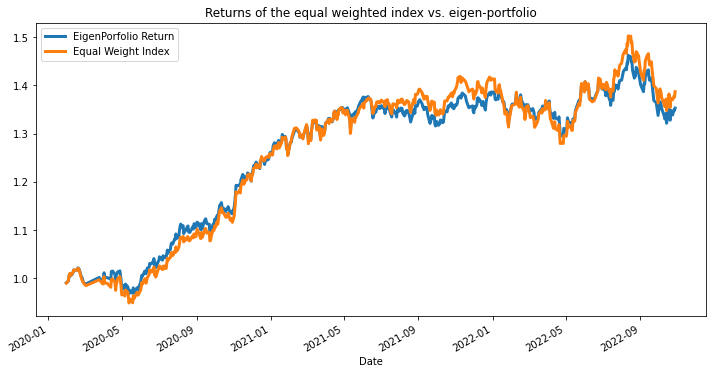

Current Eigen-Portfolio:
Return = 13.06%
Volatility = 10.80%
Sharpe = 1.21


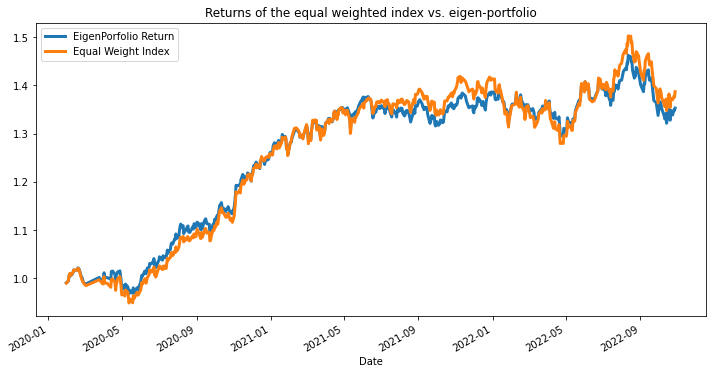

In [24]:
def Backtest(eigen):

    '''

    Plots Principle components returns against real returns.
    
    '''
   
    eigen_prtfi = pd.DataFrame(data ={'weights': eigen.squeeze()}, index = stock_tickers)
    eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)    

    eigen_prti_returns = np.dot(X_test_raw.loc[:, eigen_prtfi.index], eigen)
    eigen_portfolio_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_test_raw.index)
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)  
    print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
    equal_weight_return=(X_test_raw * (1/len(pca.components_))).sum(axis=1)    
    df_plot = pd.DataFrame({'EigenPorfolio Return': eigen_portfolio_returns, 'Equal Weight Index': equal_weight_return}, index=X_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the equal weighted index vs. eigen-portfolio' , 
                          figsize=(12,6), linewidth=3)
    plt.show()
    
Backtest(eigen=weights[3])
Backtest(eigen=weights[1])
Backtest(eigen=weights[1])

In [25]:
weights[1]

array([0.08901423, 0.06563806, 0.21704408, 0.23962946, 0.0325353 ,
       0.0457924 , 0.03931332, 0.04489083, 0.22614232])

In [26]:
df['test'] = sum([df['EEM'].pct_change() * 0.220916026, df['IWN'].pct_change() * 0.20661524, df['IWO'].pct_change() * 0.20868967,df['EFA'].pct_change() * 0.22325007, df['IVW'].pct_change() * 0.21000106,df['IVE'].pct_change() * 0.22723276, df['IEF'].pct_change() * -0.14366458,df['IAU'].pct_change() * 0.00247226,df['TLT'].pct_change() * -0.14411580])

In [27]:
df.dropna()

,EEM,EFA,IAU,IEF,IVE,IVW,IWN,IWO,TLT,test
Date,,,,,,,,,,
2010-01-04,33.181221,38.846088,21.978001,69.506180,40.110859,12.345302,46.479851,63.169449,64.334427,0.029635
2010-01-05,33.422070,38.880314,21.954000,69.811325,40.326824,12.353695,46.308178,63.006535,64.749855,0.000301
2010-01-06,33.491985,39.044666,22.326000,69.529602,40.423622,12.353695,46.214558,63.115139,63.883148,0.004444
2010-01-07,33.297760,38.894020,22.181999,69.529602,40.773640,12.345302,46.760735,63.278065,63.990597,0.002405
2010-01-08,33.561901,39.202156,22.290001,69.615700,40.848122,12.401944,47.018204,63.531467,63.961910,0.006772
...,...,...,...,...,...,...,...,...,...,...
2022-10-24,33.930000,58.000000,31.320000,93.019997,137.850006,60.509998,137.330002,213.979996,92.400002,-0.000346
2022-10-25,34.209999,59.279999,31.389999,94.180000,139.559998,61.730000,140.619995,220.509995,95.089996,0.019140
2022-10-26,34.770000,59.840000,31.600000,94.660004,140.360001,60.439999,141.250000,221.649994,96.459999,0.001852


In [28]:
import pyfolio as pf

Start date,2009-12-31
End date,2022-10-28
Total months,153
,Backtest
Annual return,8.592%
Cumulative returns,187.645%
Annual volatility,25.997%
Sharpe ratio,0.45
Calmar ratio,0.18
Stability,0.90
Max drawdown,-47.132%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,47.13,2020-01-17,2020-03-23,2020-11-16,217
1,36.54,2011-04-29,2011-10-03,2013-03-07,485
2,29.71,2021-11-08,2022-09-30,NaT,NaN
3,29.69,2015-06-23,2016-02-11,2016-12-08,383
4,26.06,2018-01-26,2018-12-24,2019-12-16,492


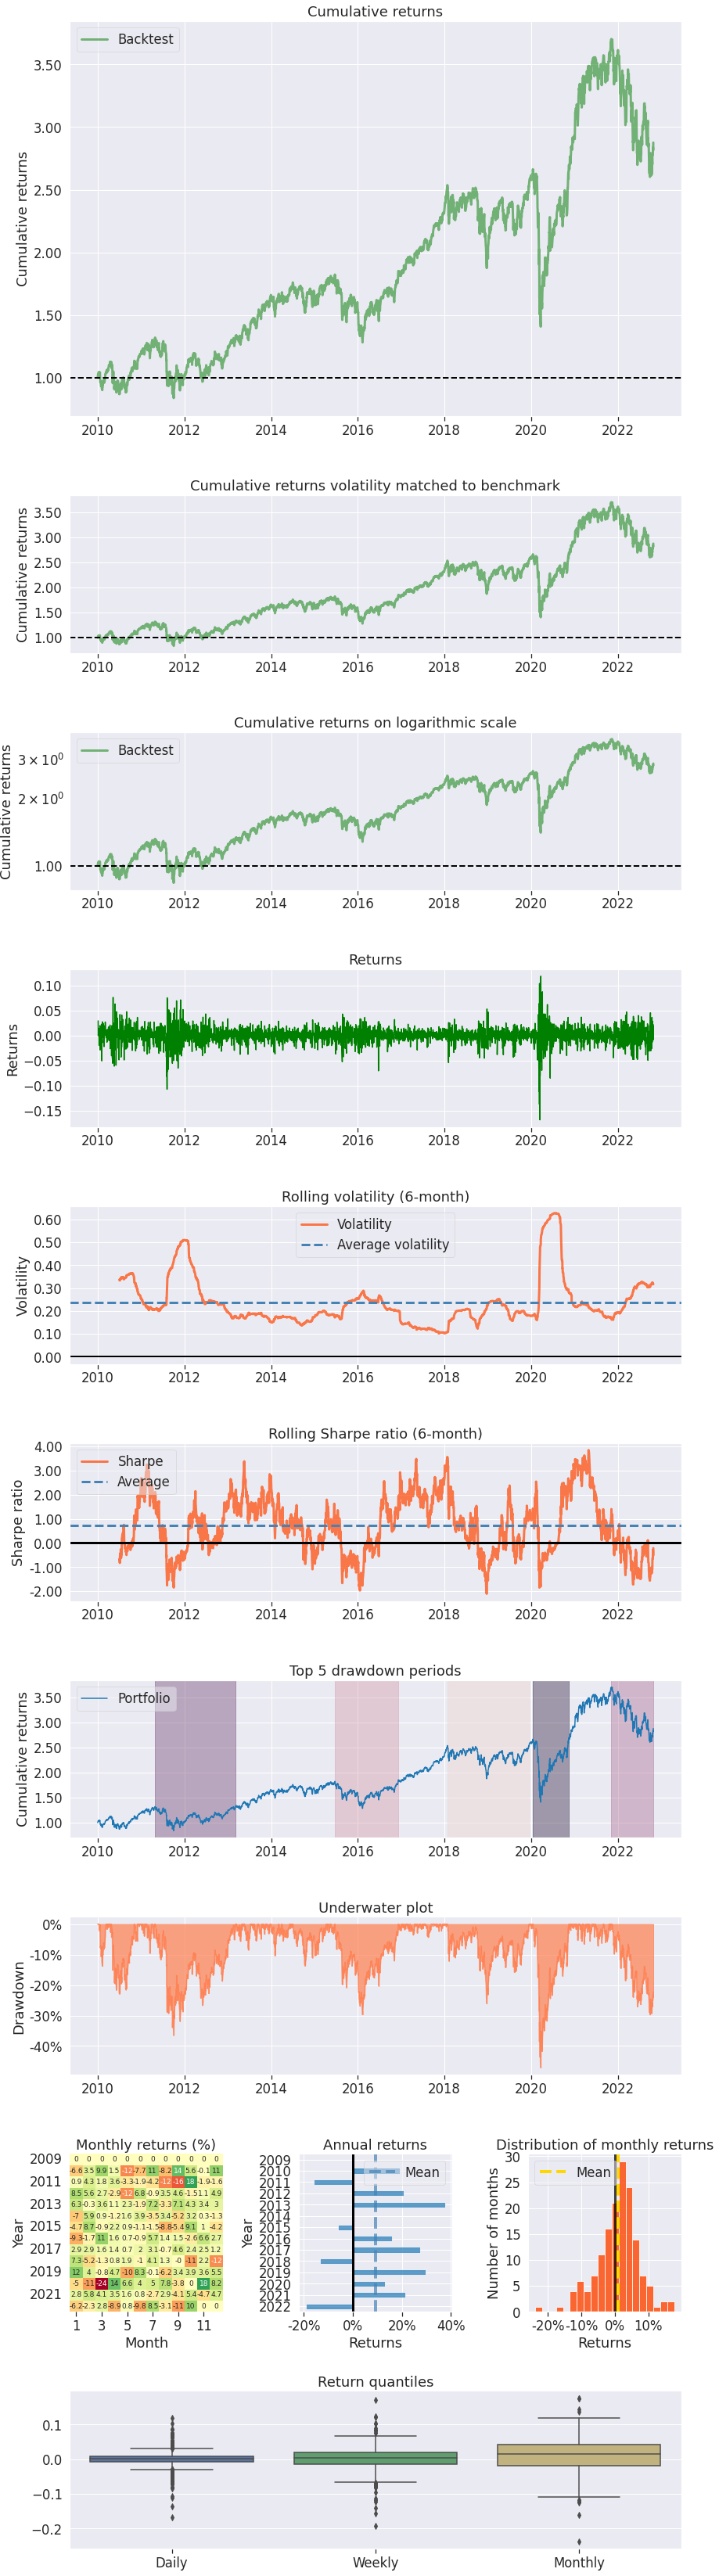

In [29]:
pf.create_returns_tear_sheet(df['test'])